In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pickle

# Remplace 'chemin_vers_fichier.pk' par le chemin de ton fichier .pk
with open('fichier_global.pk', 'rb') as fichier:
    data = pickle.load(fichier)




In [6]:
data.head()

,Solid_class,Element,Shape,Distance,Size_parameters,Eq_Radius,n_Atoms,qmin,qmax,qstep,b_iso,q,Intensities,polydispersity
0,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760072.0, 8737556.0, 8700139.0, 8647997.0, 8...",0
1,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760070.0, 8737548.0, 8700119.0, 8647962.0, 8...",0
2,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.5,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760067.0, 8737539.0, 8700101.0, 8647928.0, 8...",0
3,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.9,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760063.0, 8737522.0, 8700062.0, 8647859.0, 8...",0
4,Platonic,Al,cubefcc,2.852398,"(2, 0, 0)",6.98692,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[670041.8, 668334.06, 665496.56, 661542.0, 656...",0


In [8]:
data.dtypes

Solid_class         object
Element             object
Shape               object
Distance           float64
Size_parameters     object
Eq_Radius           object
n_Atoms             object
qmin               float64
qmax                object
qstep              float64
b_iso              float64
q                   object
Intensities         object
polydispersity      object
dtype: object

In [9]:
data['Solid_class'] = data['Solid_class'].astype('category')
data['Element'] = data['Element'].astype('category')
data['Shape'] = data['Shape'].astype('category')

# Convertir 'Size_parameters', 'Eq_Radius', 'qmax' en float
#data['Size_parameters'] = data['Size_parameters'].astype(float)
data['Eq_Radius'] = pd.to_numeric(data['Eq_Radius'], errors='coerce')
data['qmax'] = pd.to_numeric(data['qmax'], errors='coerce')

# Convertir 'n_Atoms' et 'polydispersity' en int
data['n_Atoms'] = pd.to_numeric(data['n_Atoms'], errors='coerce').astype('Int64')
data['polydispersity'] = pd.to_numeric(data['polydispersity'], errors='coerce').astype('Int64')


# Convertir 'q' et 'Intensities' en numpy array
# data['q'] = data['q'].apply(lambda x: np.array(eval(x)))
# data['Intensities'] = data['Intensities'].apply(lambda x: np.array(eval(x)))


In [10]:
data.dtypes

Solid_class        category
Element            category
Shape              category
Distance            float64
Size_parameters      object
Eq_Radius           float64
n_Atoms               Int64
qmin                float64
qmax                  int64
qstep               float64
b_iso               float64
q                    object
Intensities          object
polydispersity        Int64
dtype: object

In [11]:
data_num=data.drop(["Solid_class","Element","Shape","Size_parameters","q","Intensities"],axis=1)

Text(0.5, 1.0, 'Polydispersity')

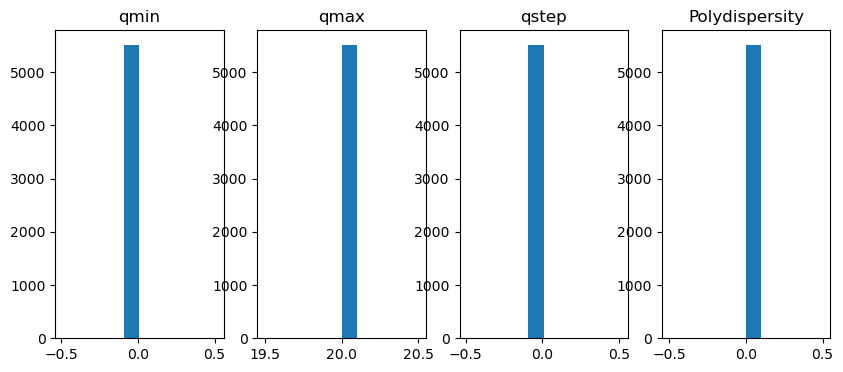

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data["qmin"])
plt.title("qmin")
plt.subplot(1,4,2)
plt.hist(data["qmax"])
plt.title("qmax")
plt.subplot(1,4,3)
plt.hist(data["qstep"])
plt.title("qstep")
plt.subplot(1,4,4)
plt.hist(data["polydispersity"])
plt.title("Polydispersity")


Text(0.5, 1.0, 'Element')

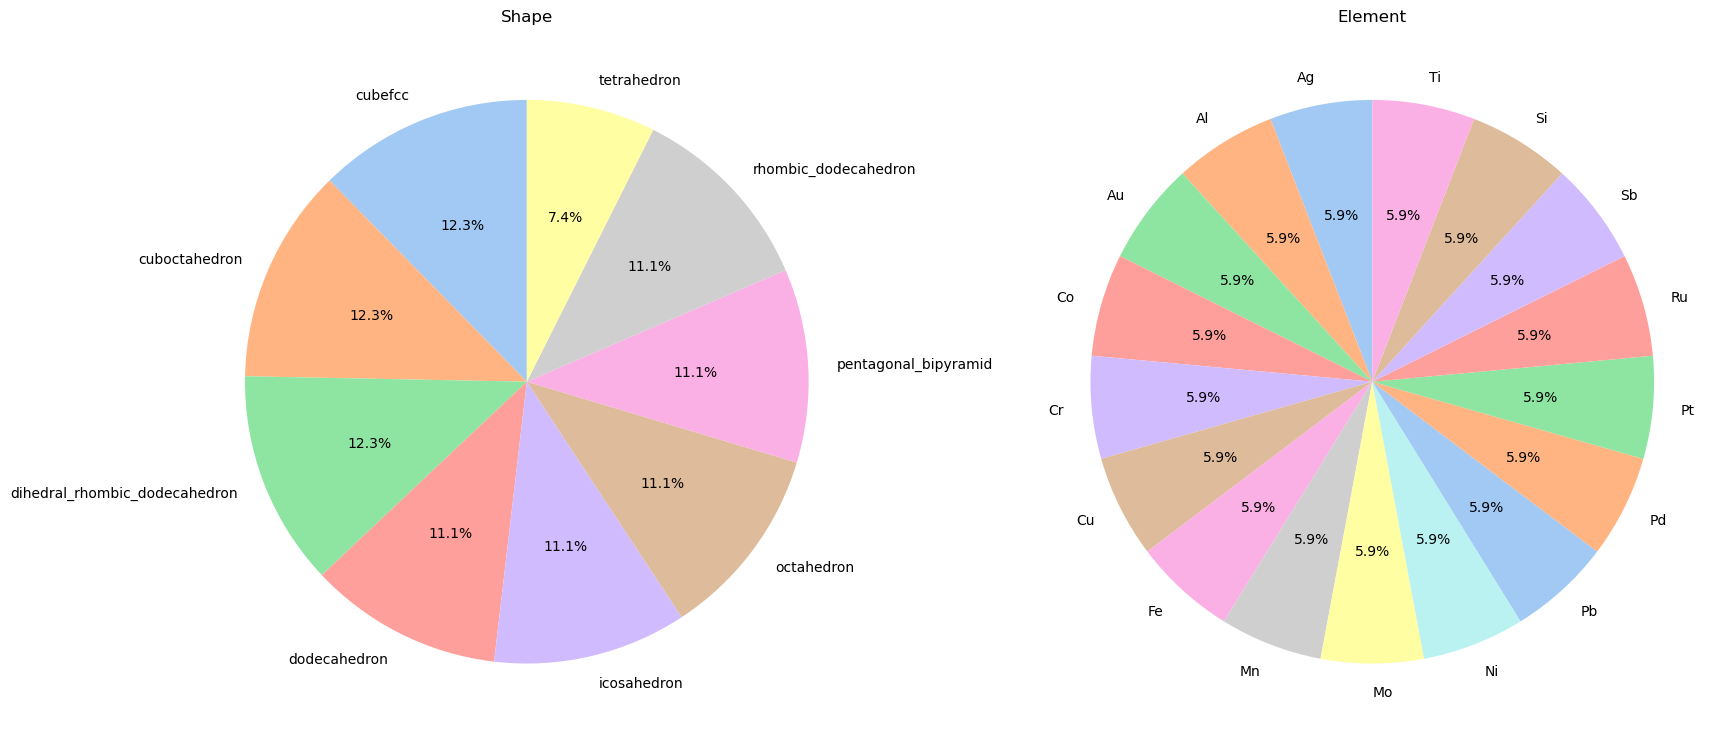

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(data['Shape'].value_counts(),labels=np.unique(data["Shape"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Shape")
plt.subplot(1,2,2)
plt.pie(data['Element'].value_counts(),labels=np.unique(data["Element"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Element")

Text(0.5, 1.0, 'b_iso')

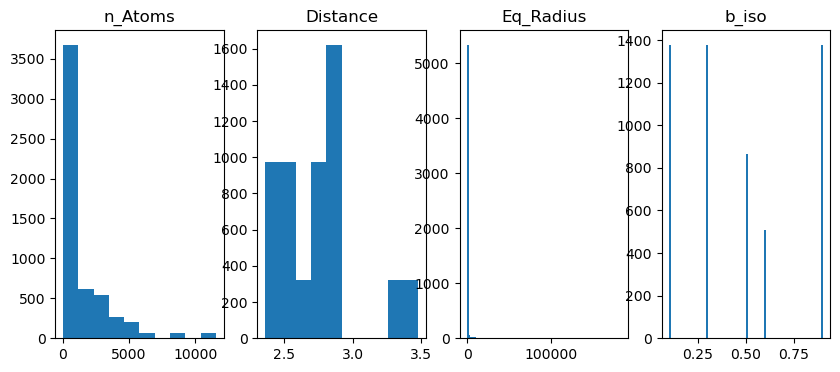

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data["n_Atoms"])
plt.title("n_Atoms")
plt.subplot(1,4,2)
plt.hist(data["Distance"])
plt.title("Distance")
plt.subplot(1,4,3)
plt.hist(data["Eq_Radius"], bins=100)
plt.title("Eq_Radius")
plt.subplot(1,4,4)
plt.hist(data["b_iso"], bins=100)
plt.title("b_iso")

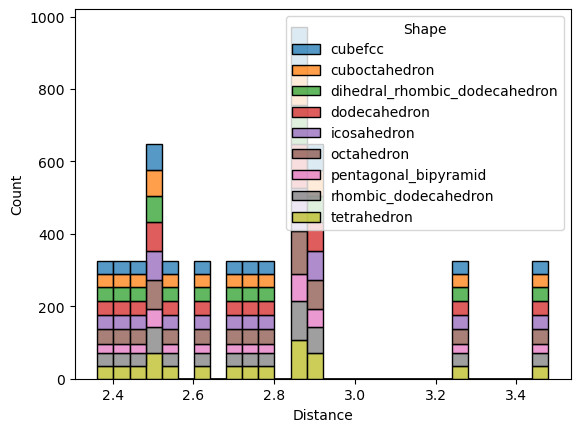

In [15]:
sns.histplot(data=data, x='Distance', hue='Shape', multiple="stack")
plt.show()

In [22]:
data

,Solid_class,Element,Shape,Distance,Size_parameters,Eq_Radius,n_Atoms,qmin,qmax,qstep,b_iso,q,Intensities,polydispersity
0,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760072.0, 8737556.0, 8700139.0, 8647997.0, 8...",0
1,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760070.0, 8737548.0, 8700119.0, 8647962.0, 8...",0
2,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.5,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760067.0, 8737539.0, 8700101.0, 8647928.0, 8...",0
3,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.9,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760063.0, 8737522.0, 8700062.0, 8647859.0, 8...",0
4,Platonic,Al,cubefcc,2.852398,"(2, 0, 0)",6.986920,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[670041.8, 668334.06, 665496.56, 661542.0, 656...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,Platonic,Si,tetrahedron,2.361737,"(10, 0, 0)",13.016362,220,0.01,20,0.01,0.9,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[9469251.0, 9422357.0, 9344688.0, 9236972.0, 9...",0
5504,Platonic,Ti,tetrahedron,2.870854,"(10, 0, 0)",15.822284,220,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[23364606.0, 23194722.0, 22914182.0, 22526814....",0
5505,Platonic,Ti,tetrahedron,2.870854,"(10, 0, 0)",15.822284,220,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[23364600.0, 23194698.0, 22914130.0, 22526724....",0
5506,Platonic,Ti,tetrahedron,2.870854,"(10, 0, 0)",15.822284,220,0.01,20,0.01,0.5,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[23364592.0, 23194676.0, 22914078.0, 22526632....",0


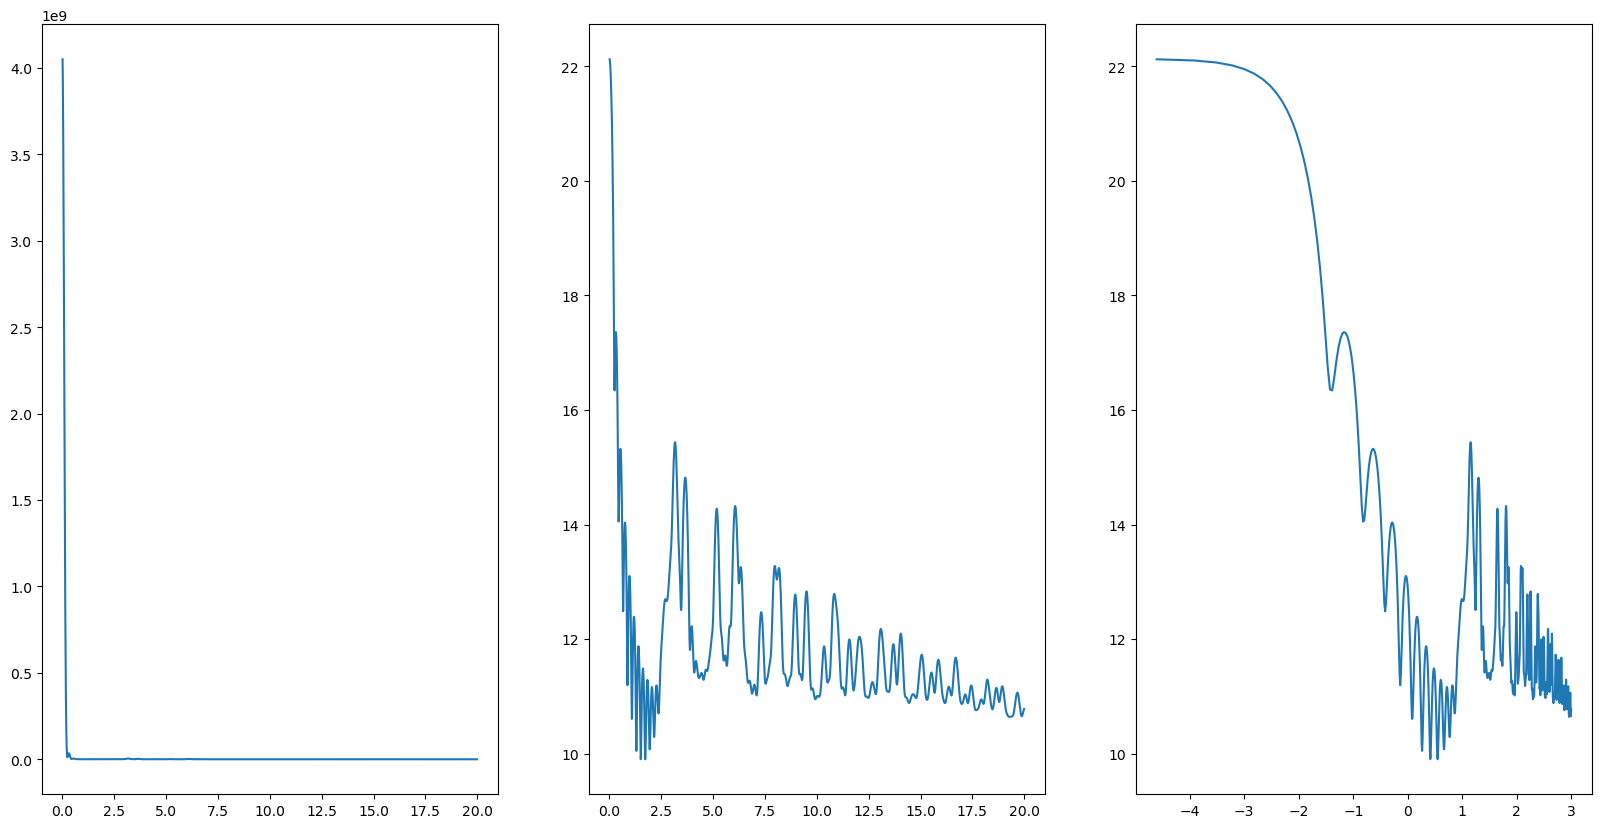

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(data.q[433],data.Intensities[433])
plt.subplot(1,3,2)
plt.plot(data.q[433],np.log(data.Intensities[433]))
plt.subplot(1,3,3)
plt.plot(np.log(data.q[433]),np.log(data.Intensities[433]))
plt.show()

In [31]:
np.unique(data.Solid_class)

array(['Archimedean', 'Catalan', 'Johnson', 'Platonic'], dtype=object)

In [32]:
np.unique(data.Element)

array(['Ag', 'Al', 'Au', 'Co', 'Cr', 'Cu', 'Fe', 'Mn', 'Mo', 'Ni', 'Pb',
       'Pd', 'Pt', 'Ru', 'Sb', 'Si', 'Ti'], dtype=object)

In [33]:
np.unique(data.Shape)

array(['cubefcc', 'cuboctahedron', 'dihedral_rhombic_dodecahedron',
       'dodecahedron', 'icosahedron', 'octahedron',
       'pentagonal_bipyramid', 'rhombic_dodecahedron', 'tetrahedron'],
      dtype=object)

In [34]:
np.unique(data.Size_parameters)

array([(1, 0, 0), (2, 0, 0), (3, 0, 0), (4, 0, 0), (4, 3, 2), (5, 0, 0),
       (5, 3, 2), (6, 0, 0), (6, 3, 2), (7, 0, 0), (7, 3, 2), (8, 0, 0),
       (8, 3, 2), (9, 0, 0), (9, 3, 2), (10, 0, 0)], dtype=object)

In [35]:
np.unique(data.polydispersity) 

array([0])

In [37]:
data.Eq_Radius.describe()

count      5508.000000
mean        563.446863
std        6148.634840
min           0.000000
25%           0.000000
50%           9.980943
75%          21.842752
max      183647.935917
Name: Eq_Radius, dtype: float64

In [40]:
(data.Eq_Radius > 100).sum()

384

In [46]:
(data.Eq_Radius > 50000).sum()

12

In [44]:
np.unique(data.b_iso)

array([0.1, 0.3, 0.5, 0.6, 0.9])

In [ ]:
# q_step, q_min, q_max, polydispersity --> inutiles 
# n_atoms Eq_radius --> eventuellement transformation logarithmique si modèle linéaire
# b_iso -->  que represente cette variable ??
# distance --> == size ??
# Size_parameters --> explications sur les 3 composantes ??

# Solid_class, Element, Shape ,Size_parameters, b_iso ---> variables qualitatives
# Distance, Eq_Radius, n_Atoms ---> variables quantitatives
# q, Intensities ---> tableaux numpy (size = 1999), tracé de l'intensité en fonction de q

# size with SAXS and shape with WAXS, les deux avec SWAXS size = première partie de la courbe et shape = deuxième partie de la courbe ??